In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [33]:
import numpy as np
import numpy.linalg as la
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from src.features.build_features import PCA
import seaborn as sns

In [4]:
datafile = "../data/processed/UTK-peers_processed.csv"
df = pd.read_csv(datafile)
df_numeric = df.select_dtypes(exclude=['object'])

In [5]:
pca = PCA()

In [6]:
pca.fit(df_numeric.values)

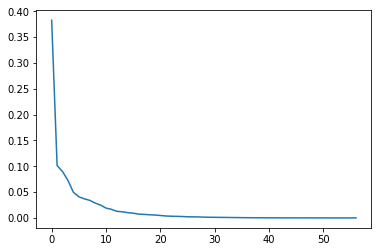

In [7]:
plt.plot(pca.explained_variance_ratio_)

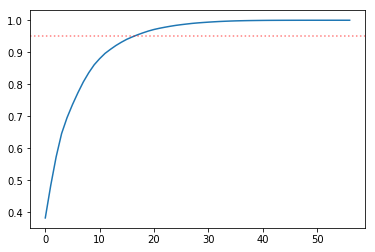

In [8]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.axhline(y=0.95, color='r', linestyle=":", alpha=0.5)

<BarContainer object of 57 artists>

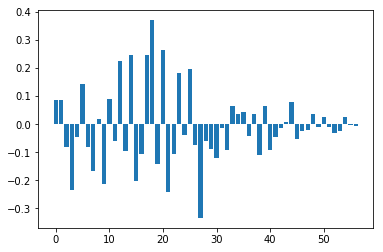

In [9]:
plt.bar(x=range(pca.v.shape[1]), height=pca.v[0])

Text(0.75, 0.25, 'DAAFA')

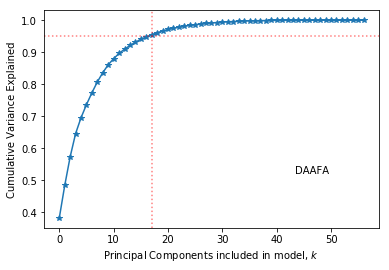

In [10]:
f, ax = plt.subplots()
ax.plot(np.cumsum(pca.explained_variance_ratio_), '*-')
ax.axhline(y=0.95, linestyle=":", color='r', alpha=0.5)
ax.axvline(x=pca.to_explain_variance_frac(0.95), linestyle=":", color='r',
            alpha=0.5)
ax.set_xlabel(r"Principal Components included in model, $k$")
ax.set_ylabel("Cumulative Variance Explained")
ax.annotate("DAAFA", 
            xy=(17, 0.95), xycoords='data',
            xytext=(0.75, 0.25), textcoords='axes fraction')

In [25]:
pca2 = PCA(variance=0.95).fit(df_numeric.values)

In [26]:
pca2.explained_variance_ratio_

array([0.38252055, 0.1013323 , 0.08967697, 0.07243369, 0.04959614,
       0.04088188, 0.03696023, 0.0339802 , 0.02877102, 0.02476341,
       0.0190162 , 0.01662324, 0.01274299, 0.0118452 , 0.01020798,
       0.00916536, 0.00735   , 0.00683611])

In [27]:
np.max(np.cumsum(pca2.explained_variance_ratio_))

0.9547034689359409

In [28]:
xst = pca2.transform(df_numeric.values)

In [29]:
xst.shape

(57, 18)

In [30]:
df_numeric.values.shape

(57, 63)

In [45]:
df_pca = pd.DataFrame(xst)
df_pca['School'] = df["Name"]

In [46]:
df_pca.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,School
0,3.357335,0.310421,-0.835317,1.259617,-0.305208,0.007543,-0.091021,1.438004,-0.442033,1.492951,-0.563822,1.281168,-0.146671,0.600573,-0.751805,0.863786,-0.169213,0.062063,Univ. of Tennessee - Knoxville
1,0.343914,-0.746051,1.595364,2.155890,1.484816,-0.033314,0.679279,1.778118,0.199352,0.563439,-0.298264,-0.397891,-0.539735,0.404140,-0.417042,0.784825,1.081770,0.551045,Univ. of Georgia
2,-1.541430,-1.005422,0.353980,2.565919,0.157638,-0.816733,-1.911637,0.826042,0.547251,0.999099,-1.285396,0.451491,-1.838743,0.990515,-0.970201,-0.198569,-0.079369,-0.383285,Purdue Univ.
3,-9.345199,-6.071639,0.873632,4.915316,-3.826254,5.906905,-0.520020,-1.625856,-1.133654,2.200119,-0.137033,-0.496202,-0.173975,-1.089578,0.599834,0.335180,-0.773836,0.463069,Texas A&M Univ.
4,-3.078347,-3.069505,0.138724,0.928737,-0.652755,-1.279364,0.110680,1.991232,0.813000,-0.379870,0.378858,-0.362086,-0.593983,-0.033940,-0.338720,-0.154582,-0.716720,-0.707829,Michigan State Univ.


In [71]:
# Code obtained from https://stackoverflow.com/questions/46027653/adding-labels-in-x-y-scatter-plot-with-seaborn
def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.02, point['y'], str(point['val']), fontdict={'size': 4})

<Figure size 1440x1440 with 0 Axes>

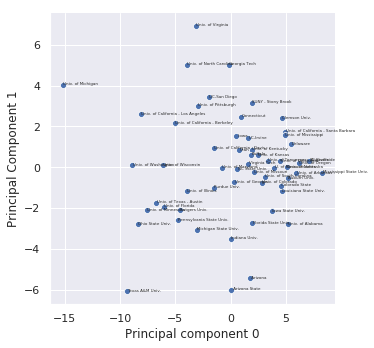

In [72]:
f = plt.figure(figsize=(20,20))
with sns.axes_style("darkgrid"):
    ax = sns.relplot(x=0, y=1, data=df_pca)
    ax.set_xlabels("Principal component 0")
    ax.set_ylabels("Principal Component 1")
    label_point(df_pca[0], df_pca[1], df_pca.School, plt.gca())
plt.savefig("test.png", dpi=300)